Exercises 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def forbedret_gram_schmidt(a):
    _, k = a.shape
    q = np.copy(a)
    r = np.zeros((k, k))
    for i in range(k):
        r[i, i] = np.linalg.norm(q[:, i])
        q[:, i] /= r[i, i]
        r[[i], i+1:] = q[:, [i]].T @ q[:, i+1:]
        q[:, i+1:] -= q[:, [i]] @ r[[i], i+1:]
    return q, r

def back_subs(r, c):
    n, _ = r.shape
    x = np.empty((n, 1))
    for i in reversed(range(n)):
        x[i] = (c[i] - r[[i], i+1:] @ x[i+1:]) / r[i, i]
    return x

In [3]:
x = np.array([0., 1.9, 3.1, 6.2, 7.1])
y = np.array([1.1, 2.1, 2.9, 4.2, 4.8])

In [4]:
cols = 2
a = np.vander(x, cols)

In [5]:
q, r = forbedret_gram_schmidt(a)

In [6]:
c = q.T @ y[:, np.newaxis]
c

array([[7.2354962 ],
       [1.52084135]])

In [7]:
koeffs = back_subs(r, c)

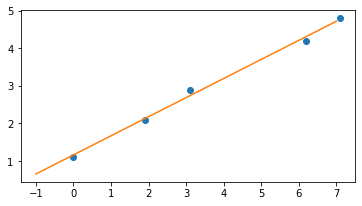

In [15]:
t = np.linspace(-1,7, 100)
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(x,y,'o')
ax.plot(t, np.vander(t, cols) @ koeffs)

In [9]:
print(koeffs)

[[0.508207  ]
 [1.15996238]]


Result is 
$$f(x)= 0.508207x^2 + 1.15996238x + 0.6575539$$

In [11]:
def f(x):
    return 0.508207*x**2+1.15996238*x+0.6575539

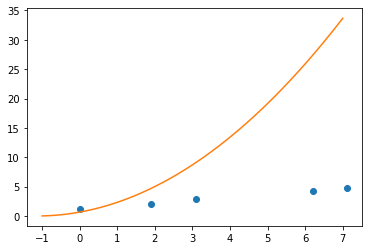

In [14]:
fig, ax = plt.subplots()
ax.plot(x,y,'o')
ax.plot(t, f(t))